In [314]:
%matplotlib inline

from statsbombpy import sb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import os
from mplsoccer.pitch import Pitch
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib.colors import to_rgba, LinearSegmentedColormap
import matplotlib.gridspec as gridspec

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from mplsoccer.utils import FontManager
import seaborn as sns

from PIL import Image

from urllib.request import urlopen
from highlight_text import HighlightText, ax_text, fig_text
import requests
from io import BytesIO
import cmasher as cmr

from scipy.ndimage import gaussian_filter


In [315]:
parser = Sbopen()
match_files = [3835337, 3835329, 3835322]
df = pd.concat([parser.event(file)[0] for file in match_files])

In [219]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'outcome_id', 'outcome_name',
       'under_pressure', 'counterpress', 'pass_cross', 'pass_switch',
       'foul_won_defensive', 'dribble_overrun',
       'ball_recovery_recovery_failure', 'off_camera', 'pass_no_touch',
       'pass_assisted_shot_id', 'pass_shot_assist', 'technique_id',
       'technique_name', 'shot_statsbomb_xg', 'end_z', 'shot_key_pass_id',
       'goalkeeper_position_id', 'goalkeeper_position_name', 'out

In [86]:
lineup = sb.lineups(match_id=3835337)

In [87]:
im = Image.open(r"C:\Users\Gusse\OneDrive\Dokumenter\Python\Womens Euro 2022\sb_text_logo.png")

In [279]:
teamName = "Denmark Women's"
tournament = "Women's EURO 2022"
pitchColor = "#7FB069"
figColor = "#7FB069"
linesColor = "black"
hteamColor = "#E32219"
hteamSecColor = "#FFFFFF"
textColor = "black"

In [89]:
dfTeam = df[df["team_name"]== teamName]

In [90]:
xgTeam = dfTeam["shot_statsbomb_xg"].sum()
xgTeam = str(round(xgTeam, 2))

In [316]:
shots = dfTeam[dfTeam["type_name"]== "Shot"]
shots = shots[['team_name', 'player_name', 'minute', 'second', "x", "y",
                       'shot_statsbomb_xg', "type_name", "outcome_name"]]

goals = shots[shots["outcome_name"] == "Goal"]

countGoals = goals.shape[0]
countShots = (shots.shape[0]+goals.shape[0])


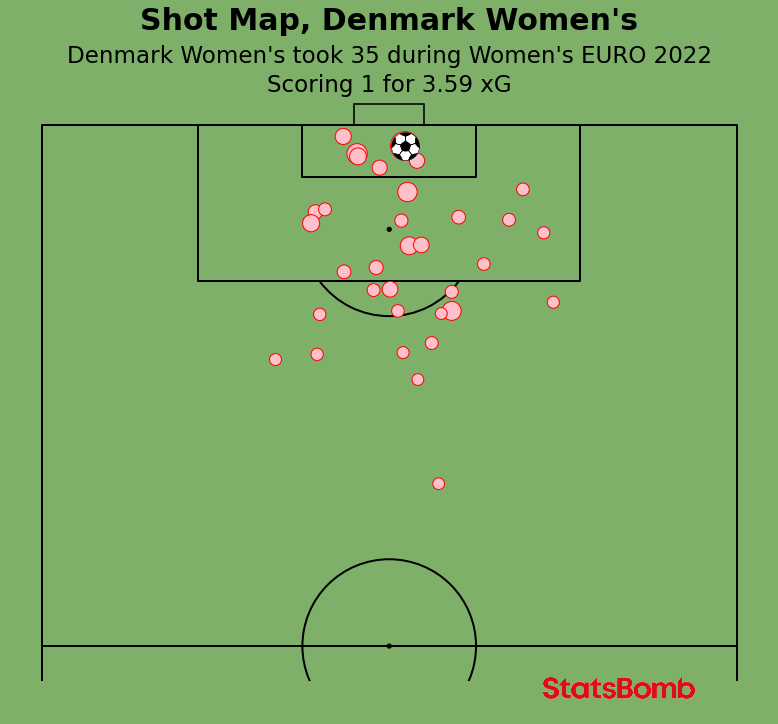

In [92]:
pitch = VerticalPitch(pitch_type='statsbomb', half=True, goal_type="box", goal_alpha=0.8,
                      pitch_color=pitchColor, line_color=linesColor)

fig,axs= pitch.grid(figheight=10, title_height=0.08, endnote_space=0, 
                    axis=False,title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor(figColor)



scatter_teamShots = pitch.scatter(shots.x, shots.y, s=(shots.shot_statsbomb_xg * 900) + 130, 
                              c='pink', edgecolors= "red", marker='o', 
                              alpha = 1, ax=axs['pitch'])
scatter_teamGoals = pitch.scatter(goals.x, goals.y, s=(goals.shot_statsbomb_xg * 900) + 130, 
                              c='white', edgecolors= "black", marker='football', 
                              alpha = 1, ax=axs['pitch'])



axs["title"].text (0.5, 1.2, (f"Shot Map, {teamName}"), color=textColor, va="center", ha="center", fontsize=30, fontweight="bold")
axs["title"].text (0.5, 0.6, (f"{teamName} took {countShots} during {tournament}"), color=textColor, va="center", ha="center", fontsize=23)
axs["title"].text (0.5, 0.1, (f"Scoring {countGoals} for {xgTeam} xG"), color=textColor, va="center", ha="center", fontsize=23)

ax3 = fig.add_axes([0.65, 0.050, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

Text(0.5, 0.6, "most of Denmark Women's where from within the box")

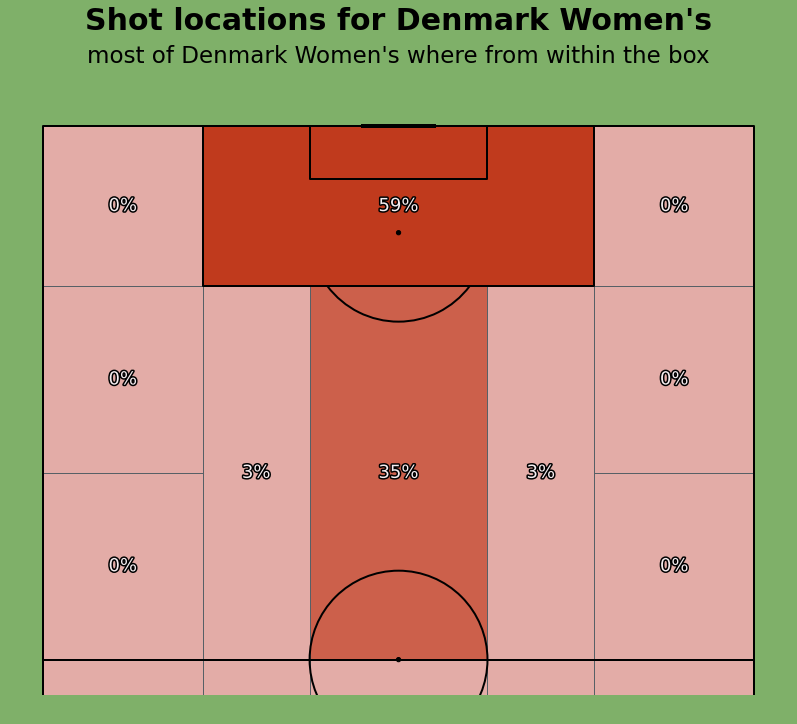

In [212]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color=pitchColor, line_color="black", half=True)
fig, axs = pitch.grid(figheight=10, endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor(pitchColor)

bin_statistic = pitch.bin_statistic_positional(shots.x, shots.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=flamingo_cmap, edgecolors='#576066')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

axs["title"].text (0.5, 1.2, (f"Shot locations for {teamName}"), color=textColor, va="center", ha="center", fontsize=30, fontweight="bold")
axs["title"].text (0.5, 0.6, (f"most of {teamName} where from within the box"), color=textColor, va="center", ha="center", fontsize=23)

In [318]:
crosses = dfTeam[dfTeam["pass_cross"]== True]
crosses = crosses[crosses["outcome_name"]!= "Incomplete"]
crosses = crosses[crosses["outcome_name"]!= "Out"]
crosses = crosses[['team_name', 'player_name', 'minute', 'second', "x", "y","end_x", "end_y", "outcome_name", 
                   "match_id", "play_pattern_name"]]

countCrosses = crosses.shape[0]

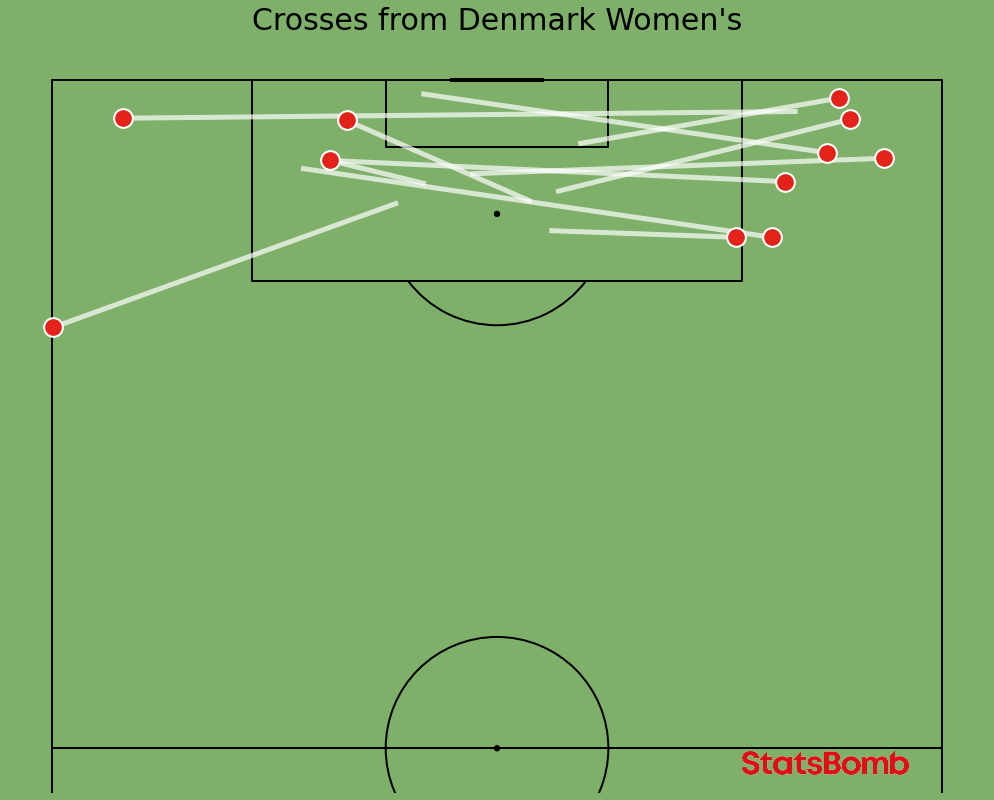

In [329]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, half=True, goal_type="line")
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)


crosses_start = pitch.scatter(crosses.x, crosses.y,
                           s=350,color=hteamColor, edgecolors=hteamSecColor, linewidth=2, alpha=1, ax=ax, zorder=2)

pitch.lines(crosses.x, crosses.y,
                  crosses.end_x, crosses.end_y, lw=5, color=hteamSecColor, ax=ax, zorder=1, alpha=.70)

ax.set_title(f"Crosses from {teamName}", fontsize=30, color=textColor)

ax3 = fig.add_axes([0.65, 0.026, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

In [93]:
pressure = (df.team_name == teamName) & (df.type_name == "Pressure")
df = df.loc[pressure, ["x", "y"]]

In [94]:
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)

In [95]:
robotto_regular = FontManager()
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

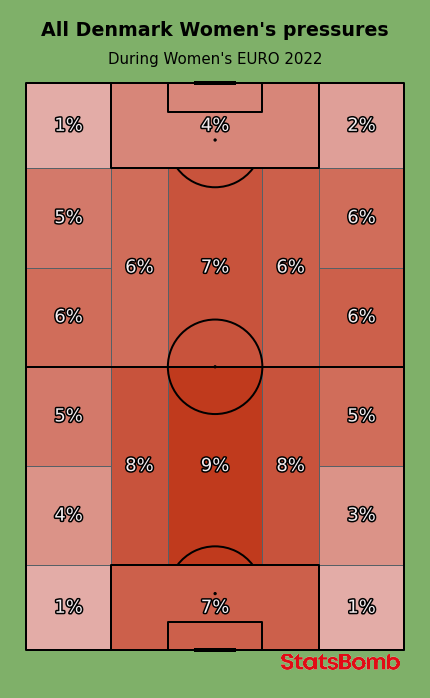

In [145]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color=pitchColor, line_color="black")
fig, axs = pitch.grid(figheight=10, endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor(pitchColor)

bin_statistic = pitch.bin_statistic_positional(df.x, df.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=flamingo_cmap, edgecolors='#576066')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

axs["title"].text (0.5, 0.6, (f"All {teamName} pressures"), color=textColor, va="center", ha="center", fontsize=19, fontweight="bold")
axs["title"].text (0.5, 0.1, (f"During {tournament}"), color=textColor, va="center", ha="center", fontsize=15)

ax3 = fig.add_axes([0.65, 0.050, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

In [320]:
passes = dfTeam[dfTeam["type_name"]== "Pass"]
passes = passes[(passes["outcome_name"]!="Kick Off") & (passes["outcome_name"]!="Goal Kick") 
                    & (passes["outcome_name"]!="Free Kick") & (passes["outcome_name"]!="Throw-in") 
                    & (passes["outcome_name"]!="Corner") & (passes["outcome_name"]!="Incomplete") 
                    & (passes["outcome_name"]!="Pass Offisde") & (passes["outcome_name"]!="Out") 
                    & (passes["outcome_name"]!="Unknown") & (passes["outcome_name"]!="Pass Offside")]
passes = passes[['team_name', 'player_name', 'minute', 'second', "x", "y",
                       "type_name", "outcome_name"]]

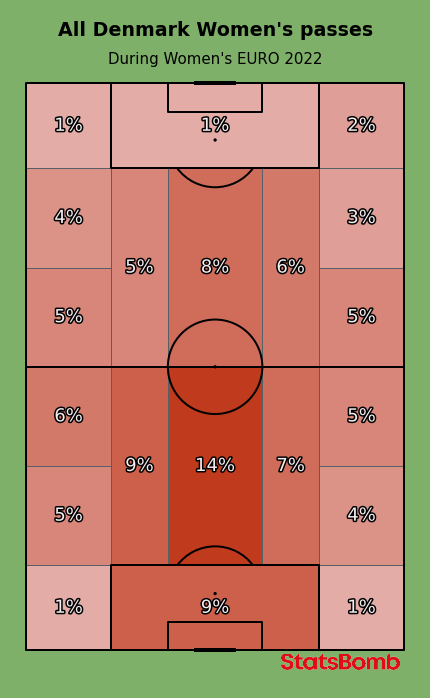

In [160]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color=pitchColor, line_color="black")
fig, axs = pitch.grid(figheight=10, endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor(pitchColor)

bin_statistic = pitch.bin_statistic_positional(passes.x, passes.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=flamingo_cmap, edgecolors='#576066')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

axs["title"].text (0.5, 0.6, (f"All {teamName} passes"), color=textColor, va="center", ha="center", fontsize=19, fontweight="bold")
axs["title"].text (0.5, 0.1, (f"During {tournament}"), color=textColor, va="center", ha="center", fontsize=15)

ax3 = fig.add_axes([0.65, 0.050, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)